<a href="https://colab.research.google.com/github/TangyB060/ADS2002-SUN/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly.express as px
import plotly.io as pio
pio.templates
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
import os
from PIL import Image
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/ranzcr-clip-catheter-line-classification/train.csv')

In [ ]:
df

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30078,1.2.826.0.1.3680043.8.498.74257566841157531124...,0,0,1,0,0,0,0,0,1,1,0,5b5b9ac30
30079,1.2.826.0.1.3680043.8.498.46510939987173529969...,0,0,0,0,0,0,0,0,0,1,0,7192404d8
30080,1.2.826.0.1.3680043.8.498.43173270582850645437...,0,0,1,0,0,1,0,1,0,1,0,d4d1b066d
30081,1.2.826.0.1.3680043.8.498.95092491950130838685...,0,0,0,0,0,0,0,0,1,0,0,01a6602b8


In [ ]:
annotations = pd.read_csv('/content/drive/My Drive/ranzcr-clip-catheter-line-classification/train_annotations.csv')

In [ ]:
annotations.head()

,StudyInstanceUID,label,data
0,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
2,1.2.826.0.1.3680043.8.498.72921907356394389969...,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
3,1.2.826.0.1.3680043.8.498.11697104485452001927...,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
4,1.2.826.0.1.3680043.8.498.87704688663091069148...,NGT - Normal,"[[1862, 14], [1845, 293], [1801, 869], [1716, ..."


In [ ]:
df.isna().sum()

StudyInstanceUID              0
ETT - Abnormal                0
ETT - Borderline              0
ETT - Normal                  0
NGT - Abnormal                0
NGT - Borderline              0
NGT - Incompletely Imaged     0
NGT - Normal                  0
CVC - Abnormal                0
CVC - Borderline              0
CVC - Normal                  0
Swan Ganz Catheter Present    0
PatientID                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

StudyInstanceUID              object
ETT - Abnormal                 int64
ETT - Borderline               int64
ETT - Normal                   int64
NGT - Abnormal                 int64
NGT - Borderline               int64
NGT - Incompletely Imaged      int64
NGT - Normal                   int64
CVC - Abnormal                 int64
CVC - Borderline               int64
CVC - Normal                   int64
Swan Ganz Catheter Present     int64
PatientID                     object
dtype: object

In [4]:
df.shape

(30083, 13)

In [5]:
df = df.drop("NGT - Incompletely Imaged", axis=1)

In [6]:
df = df.drop("Swan Ganz Catheter Present", axis=1)

In [7]:
# Create a new column 'num_ones' to count the number of 1s in each row
columns_to_exclude = ['StudyInstanceUID', 'PatientID']  # Add columns you want to exclude
df['num_ones'] = df.drop(columns_to_exclude, axis=1).sum(axis=1)

df

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,PatientID,num_ones
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,1,0,0,0,ec89415d1,1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,0,0,0,1,bf4c6da3c,2
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,1,0,3fc1c97e5,1
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,1,0,0,c31019814,1
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,1,207685cd1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
30078,1.2.826.0.1.3680043.8.498.74257566841157531124...,0,0,1,0,0,0,0,1,1,5b5b9ac30,3
30079,1.2.826.0.1.3680043.8.498.46510939987173529969...,0,0,0,0,0,0,0,0,1,7192404d8,1
30080,1.2.826.0.1.3680043.8.498.43173270582850645437...,0,0,1,0,0,0,1,0,1,d4d1b066d,3
30081,1.2.826.0.1.3680043.8.498.95092491950130838685...,0,0,0,0,0,0,0,1,0,01a6602b8,1


In [8]:
# Drop the rows where num_ones is greater than 1
df = df[df['num_ones'] <= 1]

# Drop the 'num_ones' column as it's no longer needed
df = df.drop('num_ones', axis=1)

# Print the filtered DataFrame
df

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,1,0,0,0,ec89415d1
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,1,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,1,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,1,207685cd1
8,1.2.826.0.1.3680043.8.498.91266853519846682206...,0,0,0,0,0,0,0,0,1,2edf3dce3
...,...,...,...,...,...,...,...,...,...,...,...
30075,1.2.826.0.1.3680043.8.498.12112840402677606176...,0,0,0,0,0,0,0,1,0,cccbc15ba
30076,1.2.826.0.1.3680043.8.498.59704742952729813362...,0,0,0,0,0,0,1,0,0,172c3c7ed
30077,1.2.826.0.1.3680043.8.498.97304417279653947772...,0,0,0,0,0,0,0,1,0,b304abf90
30079,1.2.826.0.1.3680043.8.498.46510939987173529969...,0,0,0,0,0,0,0,0,1,7192404d8


In [9]:
df.shape

(19240, 11)

In [10]:
print("Number of unique patients: ", df["PatientID"].unique().shape[0])

Number of unique patients:  3126


In [11]:
idCounts = df['PatientID'].value_counts().reset_index()
idCounts.columns = ['PatientID', 'Number of Observations']
idCounts = idCounts.sort_values(by = 'Number of Observations', ascending = False)
idCounts

,PatientID,Number of Observations
0,b877e913c,63
1,f93cf7e67,55
2,bb76dda43,52
3,e8f177830,50
4,d01de7ac5,47
...,...,...
2785,31e224370,1
2784,c0b57c3d9,1
2783,7755053cb,1
2782,e960df13c,1


In [ ]:
fig = px.histogram(idCounts, x='Number of Observations', title='Distribution of Number of Observations per PatientIDs', template='plotly_white')
fig.show()

In [12]:
categories = ['ETT - Abnormal',
              'ETT - Borderline',
              'ETT - Normal',
              'NGT - Abnormal',
              'NGT - Borderline',
              'NGT - Normal',
              'CVC - Abnormal',
              'CVC - Borderline',
              'CVC - Normal']

categoryCounts = df[categories].sum(axis = 0).reset_index()
categoryCounts.columns = ['Malpositions', 'Number of Observations']
categoryCounts

,Malpositions,Number of Observations
0,ETT - Abnormal,3
1,ETT - Borderline,25
2,ETT - Normal,195
3,NGT - Abnormal,17
4,NGT - Borderline,25
5,NGT - Normal,97
6,CVC - Abnormal,1691
7,CVC - Borderline,4086
8,CVC - Normal,13041


In [ ]:
fig = px.bar(categoryCounts, x = 'Number of Observations', y = 'Malpositions', template = 'plotly_white', title = 'Line and tube positions')
fig.show()

In [13]:
countsDf = {'Position Type' : [], 'Malposition'  : [], 'Number of Observations' : []}

for Type in ['Normal','Abnormal','Borderline']:
    for malposition in ['ETT','NGT','CVC']:
        colName = f'{malposition} - {Type}'
        countsDf['Position Type'].append(Type)
        countsDf['Malposition'].append(malposition)
        val = df[colName].sum(axis = 0)
        countsDf['Number of Observations'].append(val)
countsDf = pd.DataFrame(countsDf)
countsDf

,Position Type,Malposition,Number of Observations
0,Normal,ETT,195
1,Normal,NGT,97
2,Normal,CVC,13041
3,Abnormal,ETT,3
4,Abnormal,NGT,17
5,Abnormal,CVC,1691
6,Borderline,ETT,25
7,Borderline,NGT,25
8,Borderline,CVC,4086


In [ ]:
fig = px.bar(countsDf, x = 'Number of Observations', y = 'Position Type', color = 'Malposition', barmode = 'stack', template = 'plotly_white')
fig.show()

In [14]:
# Calculate the total number of observations for all position types
total_observations_all_types = countsDf['Number of Observations'].sum()

# Calculate the percentage for each position type
countsDf['Percentage'] = (countsDf['Number of Observations'] / total_observations_all_types) * 100

# Print the updated DataFrame with percentages
countsDf

,Position Type,Malposition,Number of Observations,Percentage
0,Normal,ETT,195,1.016684
1,Normal,NGT,97,0.505735
2,Normal,CVC,13041,67.992701
3,Abnormal,ETT,3,0.015641
4,Abnormal,NGT,17,0.088634
5,Abnormal,CVC,1691,8.816475
6,Borderline,ETT,25,0.130344
7,Borderline,NGT,25,0.130344
8,Borderline,CVC,4086,21.303441


In [15]:
# Assuming your DataFrame is named df
columns_to_drop = ['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal', 'NGT - Abnormal', 'NGT - Borderline', 'NGT - Normal']
df = df.drop(columns=columns_to_drop)
df

,StudyInstanceUID,CVC - Abnormal,CVC - Borderline,CVC - Normal,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,ec89415d1
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,1,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,1,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,1,207685cd1
8,1.2.826.0.1.3680043.8.498.91266853519846682206...,0,0,1,2edf3dce3
...,...,...,...,...,...
30075,1.2.826.0.1.3680043.8.498.12112840402677606176...,0,1,0,cccbc15ba
30076,1.2.826.0.1.3680043.8.498.59704742952729813362...,1,0,0,172c3c7ed
30077,1.2.826.0.1.3680043.8.498.97304417279653947772...,0,1,0,b304abf90
30079,1.2.826.0.1.3680043.8.498.46510939987173529969...,0,0,1,7192404d8


In [16]:
# Assuming filtered_df contains the filtered DataFrame after dropping rows with num_ones > 1

# Define the category columns you want to balance
category_columns = ['CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal']

# Get the count of observations in "ETT - Abnormal"
class_count = df['CVC - Abnormal'].sum()

# Create empty lists to store the sampled dataframes
sampled_dfs = []

# Sample the data for each category
for category in category_columns:
    if category != 'CVC - Abnormal':
        category_df = df[df[category] == 1]
        sampled_category_df = category_df.sample(class_count, replace=True, random_state=42)
        sampled_dfs.append(sampled_category_df)

# Include the original ETT - Abnormal rows
ett_abnormal_df = df[df['CVC - Abnormal'] == 1]
sampled_dfs.append(ett_abnormal_df)

# Concatenate the undersampled dataframes
undersampled_df = pd.concat(sampled_dfs, ignore_index=True)

# Shuffle the undersampled DataFrame
undersampled_df = undersampled_df.sample(frac=1, random_state=42)

# Print the count for each category
for category in category_columns:
    count = undersampled_df[category].sum()
    print(f"{category}: {count}")


CVC - Abnormal: 1691
CVC - Borderline: 1691
CVC - Normal: 1691


In [24]:
df_new = df[df['CVC - Abnormal'] == '1']

print(df_new)


Empty DataFrame
Columns: [StudyInstanceUID, CVC - Abnormal, CVC - Borderline, CVC - Normal, PatientID]
Index: []


In [ ]:
# #THIS IS USING MATPLOTLIB, IT TOOK 1.5 HOURS

# from skimage.transform import resize

# # Set the path to your image dataset directory
# dataset_path = '/content/drive/My Drive/ranzcr-clip-catheter-line-classification/train'

# # Get the StudyInstanceUID values from the undersampled_df
# undersampled_study_ids = undersampled_df['StudyInstanceUID'].head().tolist()

# # Initialize lists to store image names and resized pixel arrays
# StudyInstanceUID = []
# resized_pixel_arrays = []

# # Set the desired image size
# desired_size = (2048, 2500)

# # Loop through the image files, resize, and store resized pixel arrays for undersampled StudyInstanceUIDs
# for study_id in undersampled_study_ids:
#     image_file = study_id + '.jpg'  # Assuming the image filenames are StudyInstanceUID.jpg
#     image_path = os.path.join(dataset_path, image_file)
#     StudyInstanceUID.append(image_file)

#     img_array = plt.imread(image_path)
#     resized_img = resize(img_array, desired_size)
#     resized_pixel_arrays.append(resized_img)

# # Create a pandas DataFrame with StudyInstanceUID and resized pixel arrays
# resized_data = {'StudyInstanceUID': StudyInstanceUID, 'ResizedPixelArray': resized_pixel_arrays}
# resized_imgdf = pd.DataFrame(resized_data)

# resized_imgdf.head()

In [ ]:
# ALL THE 5000

# from PIL import Image
# import os
# import numpy as np
# import pandas as pd
# from tqdm import tqdm

# # Set the path to your image dataset directory
# dataset_path = '/content/drive/My Drive/ranzcr-clip-catheter-line-classification/train'

# # Get the StudyInstanceUID values from the undersampled_df
# undersampled_study_ids = undersampled_df['StudyInstanceUID'].tolist()

# # Initialize lists to store image names and resized pixel arrays
# StudyInstanceUID = []
# resized_pixel_arrays = []

# # Set the desired image size
# desired_size = (2048, 2500)

# # Loop through the image files, resize, and store resized pixel arrays for undersampled StudyInstanceUIDs
# for study_id in tqdm(undersampled_study_ids):  # tqdm adds a progress bar
#     image_file = study_id + '.jpg'  # Assuming the image filenames are StudyInstanceUID.jpg
#     image_path = os.path.join(dataset_path, image_file)
#     StudyInstanceUID.append(image_file)

#     img = Image.open(image_path)
#     resized_img = img.resize(desired_size)
#     resized_img_array = np.array(resized_img)
#     resized_pixel_arrays.append(resized_img_array)

# # Create a pandas DataFrame with StudyInstanceUID and resized pixel arrays
# resized_data = {'StudyInstanceUID': StudyInstanceUID, 'ResizedPixelArray': resized_pixel_arrays}
# resized_imgdf = pd.DataFrame(resized_data)

# resized_imgdf.head()


In [17]:
from PIL import Image
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

# Set the path to your image dataset directory
dataset_path = '/content/drive/My Drive/ranzcr-clip-catheter-line-classification/train'

# Get the StudyInstanceUID values from the undersampled_df
undersampled_study_ids = undersampled_df['StudyInstanceUID'].head(10).tolist()

# Initialize lists to store image names and resized pixel arrays
StudyInstanceUID = []
resized_pixel_arrays = []

# Set the desired image size
desired_size = (2048, 2500)

# Loop through the image files, resize, and store resized pixel arrays for undersampled StudyInstanceUIDs
for study_id in tqdm(undersampled_study_ids):  # tqdm adds a progress bar
    image_file = study_id + '.jpg'  # Assuming the image filenames are StudyInstanceUID.jpg
    image_path = os.path.join(dataset_path, image_file)
    StudyInstanceUID.append(image_file)

    img = Image.open(image_path)
    resized_img = img.resize(desired_size)
    resized_img_array = np.array(resized_img)
    resized_pixel_arrays.append(resized_img_array)

# Create a pandas DataFrame with StudyInstanceUID and resized pixel arrays
resized_data = {'StudyInstanceUID': StudyInstanceUID, 'ResizedPixelArray': resized_pixel_arrays}
resized_imgdf = pd.DataFrame(resized_data)

resized_imgdf.head()

  0%|          | 0/10 [02:00<?, ?it/s]


OSError: ignored

In [ ]:
# # Save the resized_imgdf DataFrame to a CSV file
# resized_imgdf.to_csv('resized_images_dataset.csv', index=False)

In [ ]:
# Remove the ".jpg" extension from the StudyInstanceUID column in imgdf
resized_imgdf['StudyInstanceUID'] = resized_imgdf['StudyInstanceUID'].str.replace('.jpg', '')

# Merge the two dataframes on StudyInstanceUID
merged_df = pd.merge(undersampled_df, resized_imgdf, on='StudyInstanceUID')

# Add the ".jpg" extension back to the StudyInstanceUID column in imgdf
resized_imgdf['StudyInstanceUID'] = resized_imgdf['StudyInstanceUID'] + '.jpg'

<ipython-input-152-43944d3d2960>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
merged_df

,StudyInstanceUID,CVC - Abnormal,CVC - Borderline,CVC - Normal,PatientID,ResizedPixelArray
0,1.2.826.0.1.3680043.8.498.10061097429791858965...,0,0,1,b65a62423,"[[253, 252, 252, 250, 249, 249, 249, 250, 251,..."
1,1.2.826.0.1.3680043.8.498.85805122814726704061...,0,0,1,97f61561b,"[[0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2,..."
2,1.2.826.0.1.3680043.8.498.10576118037679113226...,0,1,0,95c6fe01c,"[[38, 36, 31, 26, 23, 19, 16, 14, 11, 9, 7, 6,..."
3,1.2.826.0.1.3680043.8.498.83005605524452711368...,1,0,0,929ca58b4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,1.2.826.0.1.3680043.8.498.43357590859554557620...,0,0,1,50d613170,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2,..."
5,1.2.826.0.1.3680043.8.498.53020907912739414796...,0,0,1,ae890c888,"[[151, 147, 139, 130, 120, 114, 110, 104, 95, ..."
6,1.2.826.0.1.3680043.8.498.26523485989299647152...,1,0,0,8075d35fa,"[[2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7,1.2.826.0.1.3680043.8.498.11246400000662482146...,0,0,1,cf1ea7808,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
8,1.2.826.0.1.3680043.8.498.88232185276535677583...,0,1,0,d91af0dc0,"[[3, 5, 7, 9, 9, 8, 6, 5, 6, 6, 6, 5, 5, 7, 7,..."
9,1.2.826.0.1.3680043.8.498.88232185276535677583...,0,1,0,d91af0dc0,"[[3, 5, 7, 9, 9, 8, 6, 5, 6, 6, 6, 5, 5, 7, 7,..."


In [ ]:
# # Save the resized_imgdf DataFrame to a CSV file
# merged_df.to_csv('merged_df_dataset.csv', index=False)

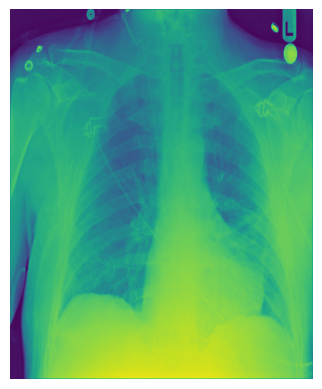

In [ ]:
image = merged_df['ResizedPixelArray'][9]
plt.imshow(image)
plt.axis('off')
plt.show()

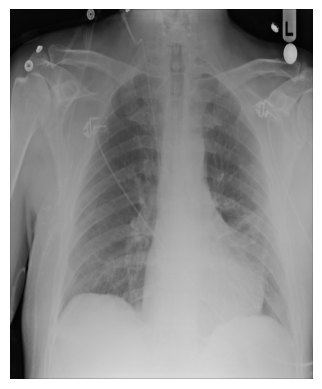

In [ ]:
import cv2
image = merged_df['ResizedPixelArray'][9]
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

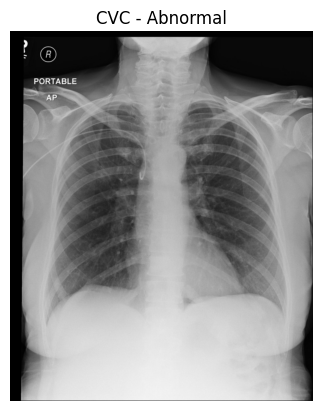

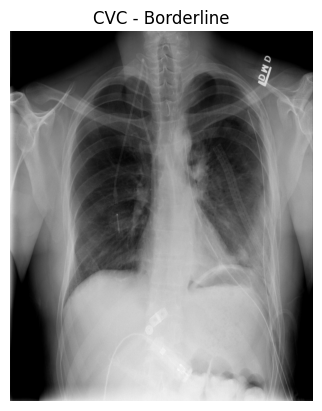

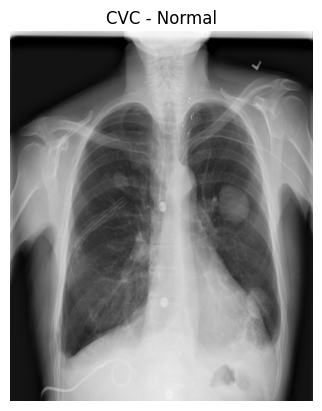

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'merged_df' containing the resized images

# List of class names
class_names = ['CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal']

# Loop through each class and display an image from that class
for class_name in class_names:
    class_df = merged_df[merged_df[class_name] == 1]  # Filter for rows of this class
    if len(class_df) > 0:
        image = class_df['ResizedPixelArray'].iloc[0]  # Get the first image from the class
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(image_rgb)
        plt.title(class_name)
        plt.axis('off')
        plt.show()


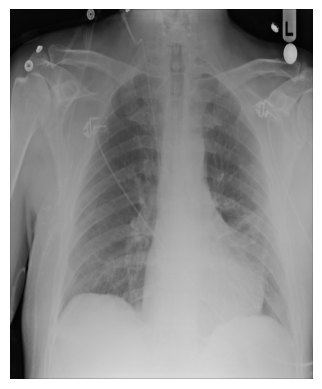

In [ ]:
import cv2
image = merged_df['ResizedPixelArray'][9]
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np

# Assuming merged_df is your DataFrame with a "ResizedPixelArray" column
numpy_array = merged_df['ResizedPixelArray'].values

# Check the data type
print(numpy_array.dtype)


object


In [ ]:
merged_df

,StudyInstanceUID,CVC - Abnormal,CVC - Borderline,CVC - Normal,PatientID,ResizedPixelArray
0,1.2.826.0.1.3680043.8.498.10061097429791858965...,0,0,1,b65a62423,"[[253, 252, 252, 250, 249, 249, 249, 250, 251,..."
1,1.2.826.0.1.3680043.8.498.85805122814726704061...,0,0,1,97f61561b,"[[0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2,..."
2,1.2.826.0.1.3680043.8.498.10576118037679113226...,0,1,0,95c6fe01c,"[[38, 36, 31, 26, 23, 19, 16, 14, 11, 9, 7, 6,..."
3,1.2.826.0.1.3680043.8.498.83005605524452711368...,1,0,0,929ca58b4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,1.2.826.0.1.3680043.8.498.43357590859554557620...,0,0,1,50d613170,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2,..."
5,1.2.826.0.1.3680043.8.498.53020907912739414796...,0,0,1,ae890c888,"[[151, 147, 139, 130, 120, 114, 110, 104, 95, ..."
6,1.2.826.0.1.3680043.8.498.26523485989299647152...,1,0,0,8075d35fa,"[[2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7,1.2.826.0.1.3680043.8.498.11246400000662482146...,0,0,1,cf1ea7808,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
8,1.2.826.0.1.3680043.8.498.88232185276535677583...,0,1,0,d91af0dc0,"[[3, 5, 7, 9, 9, 8, 6, 5, 6, 6, 6, 5, 5, 7, 7,..."
9,1.2.826.0.1.3680043.8.498.88232185276535677583...,0,1,0,d91af0dc0,"[[3, 5, 7, 9, 9, 8, 6, 5, 6, 6, 6, 5, 5, 7, 7,..."


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tf.autograph.set_verbosity(0)

In [ ]:
X = merged_df['ResizedPixelArray']
Y = merged_df[["CVC - Abnormal", "CVC - Borderline", "CVC - Normal"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=2)

In [ ]:
model = Sequential([
    Dense(10, input_shape=(2048, 2500), activation='tanh'),
    Dense(10, activation='tanh'),
    Dense(3, activation='softmax')
])

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 2048, 10)          25010     
                                                                 
 dense_19 (Dense)            (None, 2048, 10)          110       
                                                                 
 dense_20 (Dense)            (None, 2048, 3)           33        
                                                                 
Total params: 25153 (98.25 KB)
Trainable params: 25153 (98.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden2 = model.layers[1]
weights, biases = hidden2.get_weights()
print('weights :', weights)
print('biases :', biases)

weights : [[ 0.00397038  0.41290706  0.54291797  0.12334722  0.17256308  0.51428866
  -0.10806447  0.01605946 -0.11890203 -0.25495303]
 [-0.26709217  0.48816264  0.00461888 -0.3429196   0.39305007  0.1649394
  -0.3851813   0.17487419  0.5459496   0.49530566]
 [-0.17718938 -0.06731471  0.19496584  0.39114195  0.02334702 -0.02687341
  -0.44302556  0.5215144  -0.01371819  0.24462396]
 [-0.49568278 -0.3554526  -0.52214    -0.12570667 -0.52458876 -0.05974379
  -0.00925994 -0.08106881  0.09033597 -0.5104279 ]
 [ 0.48976064  0.16386831  0.47886503 -0.1274282   0.4178205   0.12461978
   0.36058986  0.1150791  -0.31943965 -0.5122009 ]
 [ 0.28494972  0.05018181  0.44803083 -0.1352129   0.5251888  -0.48349482
  -0.5324179   0.23095578  0.344136    0.11507845]
 [-0.00972706  0.3125658  -0.3142519  -0.3621244  -0.33661658 -0.12201914
   0.46332586 -0.17477077 -0.1816065  -0.05969587]
 [ 0.35724396 -0.4520029   0.02588576  0.40339702 -0.19717133  0.24639595
   0.41397315  0.27995002 -0.2111597  -0.0

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay

initial_learning_rate = 0.02
decay_rate = 0.0
decay_steps = 1

learning_rate_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=False
)

opt = SGD(learning_rate=learning_rate_schedule)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])


In [ ]:
import numpy as np
import tensorflow as tf

X_train_numpy = X_train.to_numpy()
Y_train_numpy = Y_train.to_numpy()

print(type(X_train_numpy))  # Should be <class 'numpy.ndarray'>
print(type(Y_train_numpy))  # Should be <class 'numpy.ndarray'>


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
history = model.fit(X_train_numpy, Y_train_numpy, epochs=500, validation_split=0.2, batch_size=5)

ValueError: ignored

In [1]:
!pip install split-folders matplotlib opencv-python spicy

In [2]:
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [3]:
os.chdir('/content/drive/My Drive/data/CVC normal')

In [4]:
img = plt.imread('1.2.826.0.1.3680043.8.498.99930445368564129380092715165112310967.jpg')

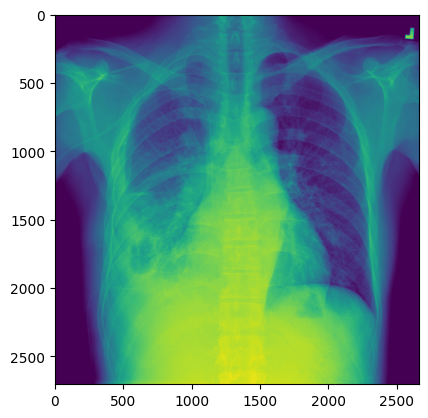

In [5]:
plt.imshow(img)

In [6]:
splitfolders.ratio("/content/drive/My Drive/data", output="/content/drive/My Drive/data-split", seed=1337, ratio=(0.7, 0.2, 0.1), group_prefix=None, move=False)

Copying files: 20 files [00:00, 28.99 files/s]


In [7]:
datagen = ImageDataGenerator()

In [8]:
class_names = ['CVC normal', 'CVC abnormal']

In [9]:
train_generator = datagen.flow_from_directory(
    directory="/content/drive/My Drive/data-split/train/",
    classes = class_names,
    target_size=(1024, 1250),
    batch_size=16,
    class_mode="binary",
)

Found 14 images belonging to 2 classes.


In [10]:
valid_generator = datagen.flow_from_directory(
    directory="/content/drive/My Drive/data-split/val/",
    classes = class_names,
    target_size=(1024, 1250),
    batch_size=16,
    class_mode="binary",
)

Found 4 images belonging to 2 classes.


In [11]:
test_generator = datagen.flow_from_directory(
    directory="/content/drive/My Drive/data-split/test/",
    classes = class_names,
    target_size=(1024, 1250),
    batch_size=16,
    class_mode="binary",
)

Found 2 images belonging to 2 classes.


In [12]:
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(1024, 1250,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [13]:
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(2, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [15]:
def trainModel(model, epochs, optimizer):
    batch_size = 16
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [19]:
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10
1/1 [==============================] - 129s 129s/step - loss: 1.0686 - accuracy: 0.6429 - val_loss: 0.7144 - val_accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 124s 124s/step - loss: 1.7125 - accuracy: 0.5714 - val_loss: 0.7150 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 123s 123s/step - loss: 1.1477 - accuracy: 0.5714 - val_loss: 0.7425 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 126s 126s/step - loss: 1.1095 - accuracy: 0.6429 - val_loss: 0.7170 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 123s 123s/step - loss: 2.5940 - accuracy: 0.5000 - val_loss: 0.7028 - val_accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 109s 109s/step - loss: 2.2876 - accuracy: 0.5000 - val_loss: 0.7170 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 107s 107s/step - loss: 1.8654 - accuracy: 0.3571 - val_loss: 0.7278 - val_accuracy: 0.5000
Epoch 8/10
1/

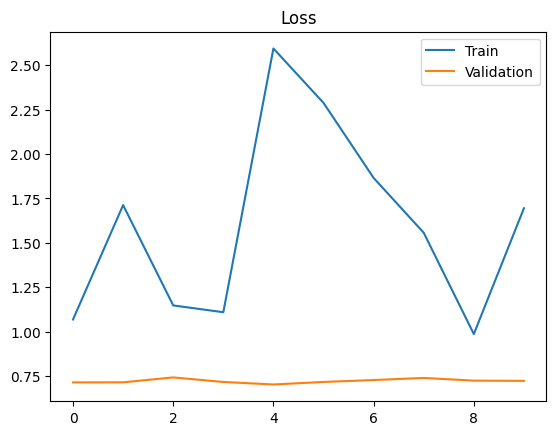

In [20]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

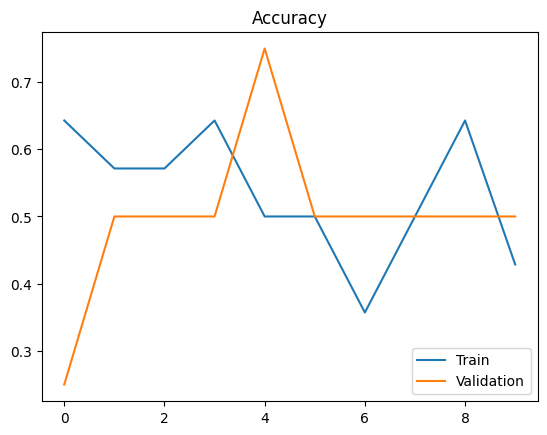

In [21]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

1/1 [==============================] - 13s 13s/step - loss: 0.6693 - accuracy: 0.5000
The test loss is:  0.6693321466445923
The best accuracy is:  50.0


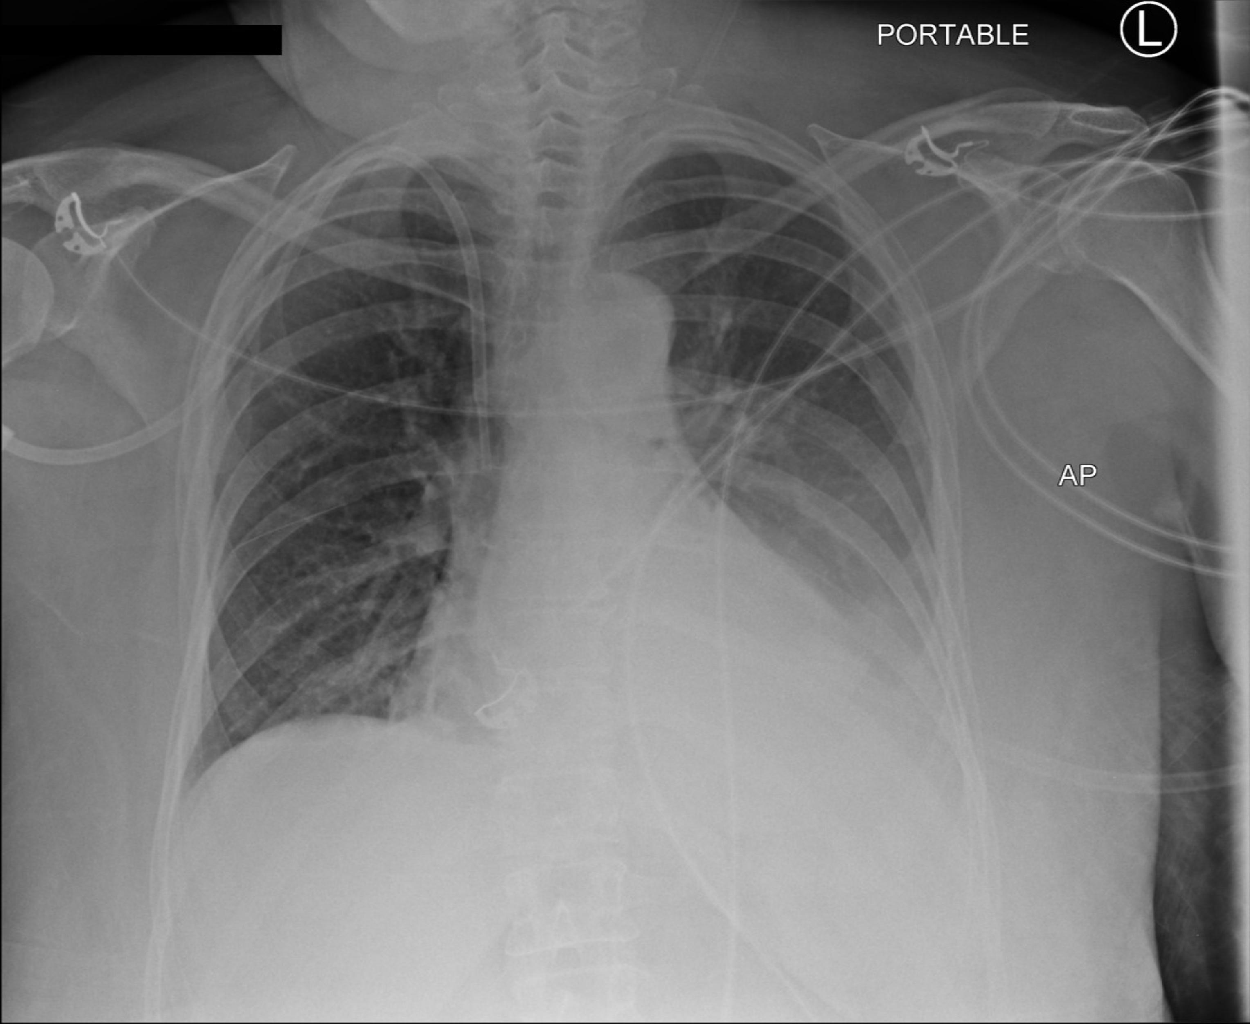

In [24]:
img2 = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/data-split/test/CVC normal/1.2.826.0.1.3680043.8.498.99991581639229040366812735770671130168 (1).jpg', target_size=(1024, 1250))
img_array = tf.keras.preprocessing.image.img_to_array(img2)
img_array = np.array([img_array])
img2

In [25]:
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 7s 7s/step
[[0.58234626 0.41765377]]


In [26]:
class_id = np.argmax(predictions, axis = 1)
print(class_id)


[0]


In [27]:
class_names[class_id.item()]

'CVC normal'